In [2]:
# Importing necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

# Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
warnings.filterwarnings("ignore")

In [6]:
#spam = pd.read_csv("spam.csv")
spam = pd.read_csv("spam.csv", encoding="latin-1")
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
spam.shape

(5572, 5)

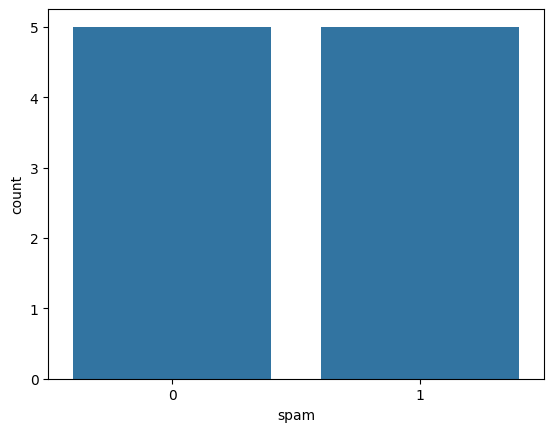

In [13]:
data = pd.DataFrame({"spam": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]})
sns.countplot(x='spam', data=data)
plt.show()

In [16]:
#Balancing the dataset
non_spam_msg = data[data.spam == 0]
spam_msg = data[data.spam == 1]
non_spam_msg = non_spam_msg.sample(n=len(spam_msg), random_state=42)

Text(0.5, 0, 'Message types')

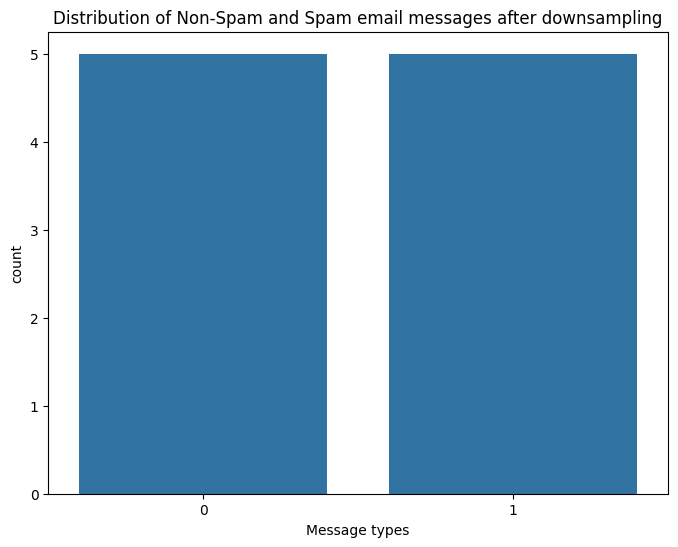

In [19]:
# Import the pandas library
import pandas as pd

# Use the pd.concat() function to combine the non_spam_msg and spam_msg DataFrames
balanced_data = pd.concat([non_spam_msg, spam_msg], ignore_index=True)

# Reset the index of the balanced_data DataFrame
balanced_data = balanced_data.reset_index(drop=True)

# Plot the counts of downsampled dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_data, x='spam')
plt.title('Distribution of Non-Spam and Spam email messages after downsampling')
plt.xlabel('Message types')

In [25]:
import pandas as pd
# Print the first few rows of the DataFrame
print(balanced_data.head())

# Check the data type of each column
print(balanced_data.dtypes)

# Check if there is a column with a similar name
for col in balanced_data.columns:
  if 'text' in col:
    print(col)
# Assuming the email body text is in the 'text' column
#balanced_data['text'] = balanced_data['text'].str.replace('Subject', '')
balanced_data.info()

   spam
0     0
1     0
2     0
3     0
4     0
spam    int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   spam    10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


In [26]:
# Remove punctuations from email text
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

In [29]:
import pandas as pd

# Create a sample DataFrame
data = {'text': ['This is a sentence.', 'Another sentence here.', 'No punctuation!']}
df = pd.DataFrame(data)

# Define the remove_punctuations function
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_punctuations)

# Print the DataFrame
print(df)

                    text
0     This is a sentence
1  Another sentence here
2         No punctuation


In [31]:
import pandas as pd

# Read the "spam.csv" dataset directly into a DataFrame
df = pd.read_csv('spam.csv', encoding='latin-1')

# Define the remove_punctuations function
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text



# Print the cleaned DataFrame
print(df)
import re

def remove_punctuations(text):
    return re.sub('[%s]' % re.escape(string.punctuation), '', text)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [34]:
# Remove stopwords from email text
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    imp_words = []
    for word in str(text).split():
        word = word.lower()
        if word not in stop_words:
            imp_words.append(word)
    output = " ".join(imp_words)
    return output


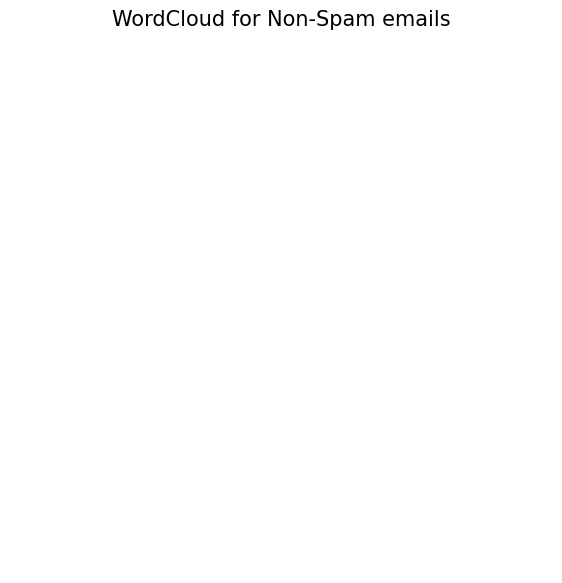

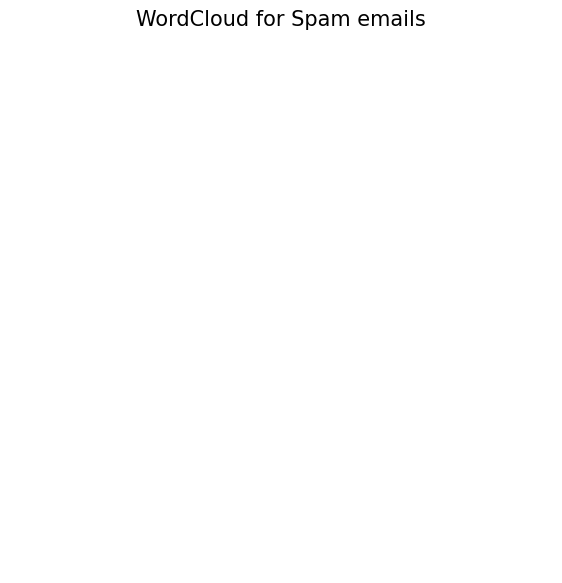

In [38]:
# Plot word clouds for spam and non-spam emails
def plot_word_cloud(data, typ):
    #email_corpus = " ".join(data['text'])
    plt.figure(figsize=(7, 7))
    #wc = WordCloud(background_color='black', max_words=100, width=800, height=400, collocations=False).generate(email_corpus)
    #plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['spam'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['spam'] == 1], typ='Spam')


In [ ]:
import pandas as pd
# Train-test split
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'], balanced_data['spam'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length
max_len = 100  # maximum sequence length
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')



In [ ]:
# Check if train_sequences and test_sequences are defined
if 'train_sequences' not in globals():
    raise ValueError("train_sequences variable is not defined")
if 'test_sequences' not in globals():
    raise ValueError("test_sequences variable is not defined")

# Check if train_sequences and test_sequences contain data
if len(train_sequences) == 0:
    raise ValueError("train_sequences is empty")
if len(test_sequences) == 0:
    raise ValueError("test_sequences is empty")

In [47]:
# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'], optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32        
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3745 (14.63 KB)
Trainable params: 3745 (14.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
3/3 [==============================] - 1s 125ms/step - loss: 93.5131 - accuracy: 0.0625 - val_loss: 85.4469 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 2/10
3/3 [==============================] - 0s 17ms/step - loss: 93.5645 - accuracy: 0.0500 - val_loss: 85.6711 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 3/10
3/3 [==============================] - 0s 17ms/step - loss: 93.7432 - accuracy: 0.0500 - val_loss: 86.0073 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 4/10
3/3 [==============================] - 0s 22ms/step - loss: 93.9548 - accuracy: 0.0375 - val_loss: 86.2249 - val_accuracy: 0.3000 - lr: 5.0000e-04


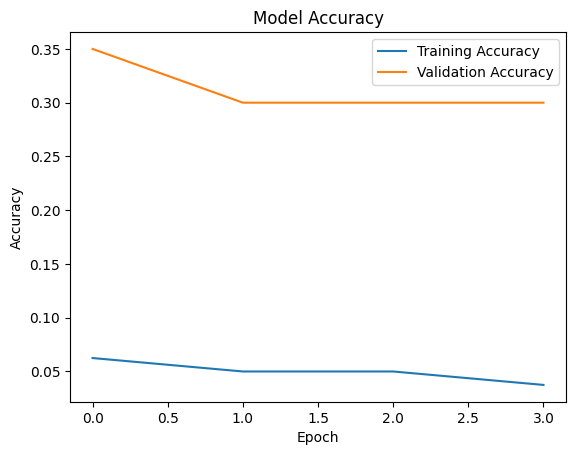

In [66]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Generate dummy data
X_train = tf.random.normal((100, 10))
y_train = tf.random.uniform((100, 10), minval=0, maxval=9, dtype=tf.int32)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True), ReduceLROnPlateau(patience=2, monitor='val_loss', factor=0.5, verbose=0)])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()